In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd
from Bio import motifs              
from Bio.Seq import Seq    

# Exercise 1

In [9]:
def calculate_selection_probabilities(fitness_function):
    individuals = [2, 3, 4]
    fitness_values = [fitness_function(x) for x in individuals]
    total_fitness = sum(fitness_values)
    selection_probabilities = [value / total_fitness for value in fitness_values]
    return individuals, fitness_values, selection_probabilities

def plot_pie_chart(individuals, probabilities, equation):
    labels = [f'x = {individual}' for individual in individuals]
    plt.pie(probabilities, labels=labels, autopct="%1.1f%%")
    plt.title(f"Selection Probabilities: {equation}")
    plt.savefig(f"figs/fitness_function_{equation}.png")
    plt.show()


----- Fitness Function: $f(x) = |x|$ -----
Individuals: [2, 3, 4]
Fitness Values: [2, 3, 4]
Selection Probabilities: [0.2222222222222222, 0.3333333333333333, 0.4444444444444444]


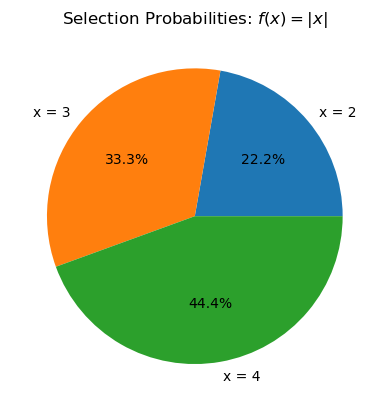


----- Fitness Function: $f(x) = x^2$ -----
Individuals: [2, 3, 4]
Fitness Values: [4, 9, 16]
Selection Probabilities: [0.13793103448275862, 0.3103448275862069, 0.5517241379310345]


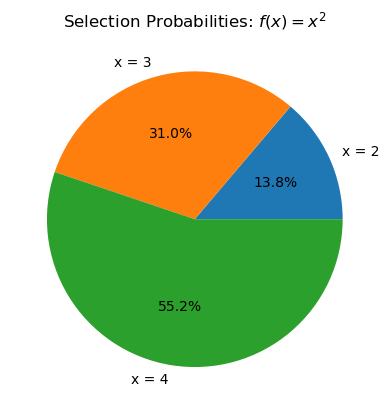


----- Fitness Function: $f(x) = 2x^2$ -----
Individuals: [2, 3, 4]
Fitness Values: [8, 18, 32]
Selection Probabilities: [0.13793103448275862, 0.3103448275862069, 0.5517241379310345]


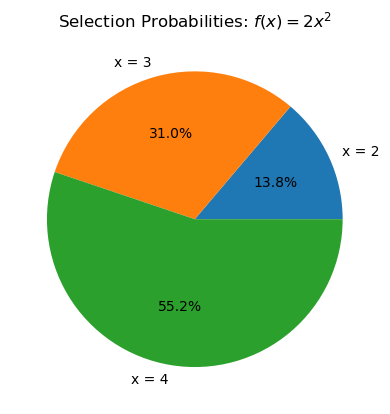


----- Fitness Function: $f(x) = x^2 + 20$ -----
Individuals: [2, 3, 4]
Fitness Values: [24, 29, 36]
Selection Probabilities: [0.2696629213483146, 0.3258426966292135, 0.4044943820224719]


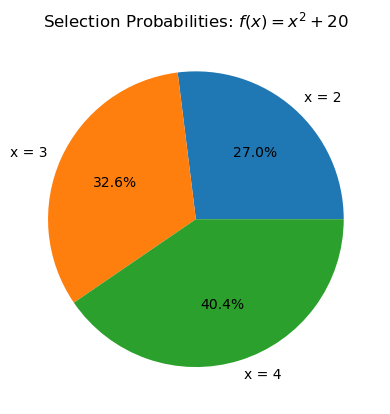

In [10]:
# define different fitness functions
fitness_functions = [
    (lambda x: abs(x), "$f(x) = |x|$"),
    (lambda x: x**2, "$f(x) = x^2$"),
    (lambda x: 2 * x**2, "$f(x) = 2x^2$"),
    (lambda x: x**2 + 20, "$f(x) = x^2 + 20$")
]

# calculate probabilities and plot for each function
for func, equation in fitness_functions:
    individuals, fitness_values, probabilities = calculate_selection_probabilities(func)
    print(f"\n----- Fitness Function: {equation} -----")
    print("Individuals:", individuals)
    print("Fitness Values:", fitness_values)
    print("Selection Probabilities:", probabilities)
    plot_pie_chart(individuals, probabilities, equation)

# Exercise 2

# Exercise 3

In [11]:
#HELPER FUNCTIONS FOR GENETIC ALGORITHM
def generate_random_string(length, alphabet):
  """Generates a random string of the given length from the alphabet."""
  return ''.join(random.choice(alphabet) for _ in range(length))

def fitness(target_string, string):
  """Calculates the fitness of a string based on fraction of 'correct' characters."""
  score = 0
  for i in range(len(target_string)):
    if target_string[i] == string[i]:
      score += 1
  return score / len(target_string)

def tournament_selection(target_string, population, N, k):
  """Selects N individuals from the population using tournament selection over k competitors per round."""
  selected = []
  for _ in range(N):
    competitors = random.sample(population, k)
    best = max(competitors, key=lambda x: fitness(target_string, x))
    selected.append(best)
  return selected

def crossover(parent1, parent2, crossover_rate):
  """Performs single-point crossover on two parent strings with probability equal to crossover_rate."""
  if random.random() < crossover_rate:
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
  else:
    child1, child2 = parent1, parent2
  return child1, child2

def mutate(string, mutation_rate, alphabet):
  """Mutates a string with a given probability."""
  mutated_string = list(string)
  for i in range(len(mutated_string)):
    if random.random() < mutation_rate:
      mutated_string[i] = random.choice(alphabet)
  return ''.join(mutated_string)

In [12]:
def genetic_algorithm(target_string, alphabet, population_size, generation_limit, crossover_rate, mutation_rate, k, USE_LIMIT=True):
  # generate initial population of random strings
  population = [generate_random_string(len(target_string), alphabet) for _ in range(population_size)]

  # ensure generational replacement by perforing N/2 crossovers each generation giving N children
  N_crossover = population_size // 2

  # initialize convergence variables
  generation_count = 0 
  best_individual = max(population, key=lambda x: fitness(target_string, x))
  
  # run the genetic algorithm for a fixed number of generations
  while True:
    # tournament select N individuals from the population 
    selected = tournament_selection(target_string, population, N_crossover, k)

    # the winners can have babies with probability c
    children = []
    for i in range(0, len(selected), 2):
      child1, child2 = crossover(selected[i], selected[(i + 1) % len(selected)], crossover_rate)
      children.extend([child1, child2])

    # MUTATE babies with probability mu 
    mutated_children = [mutate(child, mutation_rate, alphabet) for child in children]

    # kick out ALL the boomers (generational replacement without elitism)
    population = mutated_children

    # update convergence variables
    best_individual = max(population, key=lambda x: fitness(target_string, x))
    generation_count += 1 

    # check if the maximum fitness is 1 or a certain threshold
    if fitness(target_string, best_individual) == 1:
        break

    # stop if we reach the generation limit and USE_LIMIT is True
    if USE_LIMIT and generation_count >= generation_limit:
      break

  return best_individual, generation_count


In [13]:
#set parameters consistent across experiments
target_string = "meoWmeOwmeoWOW" #target string of approximately 15 characters
alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ" #alphabet containing all lowercase and uppercase letters

L = len(target_string)
population_size = 200
crossover_rate = 1

### 5.1 + 5.2

In [14]:
def run_genetic_algorithm(mutation_rate, USE_LIMIT):
    solutions, generation_counts = [], []

    for _ in range(repeats):
        solution, generation_count = genetic_algorithm(target_string, alphabet, population_size, generation_limit, crossover_rate, mutation_rate, k)
        solutions.append(solution)
        generation_counts.append(generation_count)

    successes = sum(solution == target_string for solution in solutions)
    success_rate = successes / repeats

    return success_rate, generation_counts

# Set common parameters
k = 2   # number of competitors for each tournament selection
repeats = 1000 # number of times to repeat each experiment
generation_limit = 100

# Run genetic algorithm with different mutation rates and generation limits
mutation_rate_1 = 1 / L
USE_LIMIT_1 = False

mutation_rate_2 = 1e-14 #avoid numerical issues
USE_LIMIT_2 = True

mutation_rate_3 = 3 / L
USE_LIMIT_3 = True

# Run and print results
success_rate_1, generation_counts_1 = run_genetic_algorithm(mutation_rate_1, USE_LIMIT_1)
success_rate_2, generation_counts_2 = run_genetic_algorithm(mutation_rate_2, USE_LIMIT_2)
success_rate_3, generation_counts_3 = run_genetic_algorithm(mutation_rate_3, USE_LIMIT_3)

print(f"Mutation Rate: {mutation_rate_1},  Success Rate: {success_rate_1:.2f}, Average Generation count: {np.mean(generation_counts_1):.2f}")
print(f"Mutation Rate: {mutation_rate_2},  Success Rate: {success_rate_2:.2f}, Average Generation count: {np.mean(generation_counts_2):.2f}")
print(f"Mutation Rate: {mutation_rate_3},  Success Rate: {success_rate_3:.2f}, Average Generation count: {np.mean(generation_counts_3):.2f}")

Mutation Rate: 0.07142857142857142,  Success Rate: 0.71, Average Generation count: 78.94
Mutation Rate: 1e-14,  Success Rate: 0.00, Average Generation count: 99.93
Mutation Rate: 0.21428571428571427,  Success Rate: 0.00, Average Generation count: 100.00


/Users/ringo/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ringo/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ringo/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 98.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ringo/anaconda3/envs/DeepLearning/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 50.6% of the points cannot be placed; you may want 

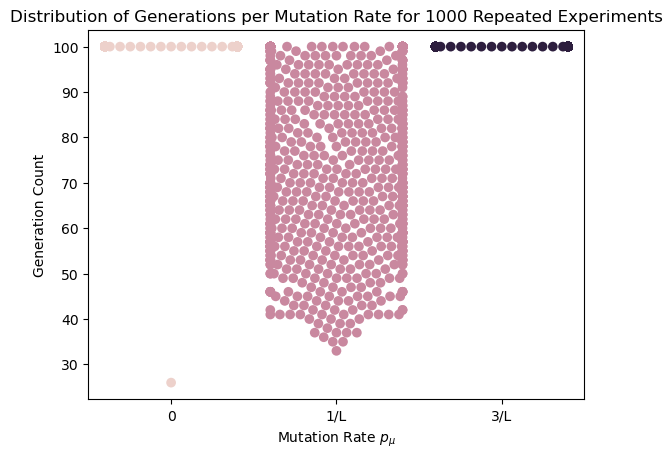

In [15]:
mutation_rates = [mutation_rate_1, mutation_rate_2, mutation_rate_3]
mutation_rates = [round(rate, 3) for rate in mutation_rates] # Round to 3 decimal places
generation_counts = [generation_counts_1, generation_counts_2, generation_counts_3]

# Create pandas DataFrame to use seaborn
data = {
    'mutation_rate': sum([[rate] * len(counts) for rate, counts in zip(mutation_rates, generation_counts)], []),
    'generation_count': sum(generation_counts, [])
}
df = pd.DataFrame(data)

#seaborn swarmplot
sns.swarmplot(
    x="mutation_rate",
    y="generation_count",
    hue="mutation_rate",  
    size=7,  
    data=df
)

# PLOT !
plt.xlabel("Mutation Rate $p_\mu$") 
plt.ylabel("Generation Count")  
plt.title(f"Distribution of Generations per Mutation Rate for {repeats} Repeated Experiments")
plt.legend().remove()  
x_ticks = ['0', '1/L', '3/L']
plt.xticks(range(len(mutation_rates)), x_ticks)  

plt.savefig('figs/mutation_rate_vs_generation_count.png')  
plt.show()

### 5.3 + 5.4 + 5.5


In [20]:
def pairwise_hamming_distance(population):
    """Calculates the mean pairwise Hamming distance in the population."""
    distances = [sum(a != b for a, b in zip(x, y)) for x in population for y in population]
    return np.mean(distances) / len(population[0])

def plot_population_diversity(diversity_data, repeats):
    """Plots the population diversity over generations."""
    generations = np.arange(0, repeats, 10)                   #change accordingly to where you put it to fit dimensions
    plt.plot(generations, diversity_data, marker='o')
    plt.xlabel('Generation')
    plt.ylabel('Mean Pairwise Hamming Distance')
    plt.title('Population Diversity Over Generations')
    plt.show()

def sequence_logo(last_generation_population):
    """Plots a sequence logo of the population in the last generation."""
    m = motifs.create([Seq(seq) for seq in last_generation_population])
    m.weblogo("sequence_logo.png")

In [23]:
def genetic_algorithm(target_string, alphabet, population_size, generation_limit, crossover_rate, mutation_rate, k, USE_LIMIT=True):

  # generate initial population of random strings
  population = [generate_random_string(len(target_string), alphabet) for _ in range(population_size)]

  # ensure generational replacement by perforing N/2 crossovers each generation giving N children
  N_crossover = population_size // 2

  # initialize convergence variables
  generation_count = 0                                                        #new
  diversity_data = []                                                         #new
  diversity_interval = 10
  best_individual = max(population, key=lambda x: fitness(target_string, x))

  # run the genetic algorithm for a fixed number of generations
  while fitness(target_string, best_individual) != 1:
    # tournament select N individuals from the population
    selected = tournament_selection(target_string, population, N_crossover, k)

    # the winners can have babies with probability c
    children = []
    for i in range(0, len(selected), 2):
      child1, child2 = crossover(selected[i], selected[(i + 1) % len(selected)], crossover_rate)
      children.extend([child1, child2])

    # MUTATE babies with probability mu
    mutated_children = [mutate(child, mutation_rate, alphabet) for child in children]

    # kick out ALL the boomers (generational replacement without elitism)
    population = mutated_children

    # update convergence variables
    best_individual = max(population, key=lambda x: fitness(target_string, x))
    generation_count += 1

    # calculate diversity every 'diversity_interval' generations              New
    if generation_count % diversity_interval == 0:
        diversity = pairwise_hamming_distance(population)
        diversity_data.append(diversity)

    # stop if we reach the generation limit and USE_LIMIT is True
    if USE_LIMIT and generation_count >= generation_limit:
      break

  return best_individual, generation_count, diversity_data

ValueError: x and y must have same first dimension, but have shapes (13,) and (12,)

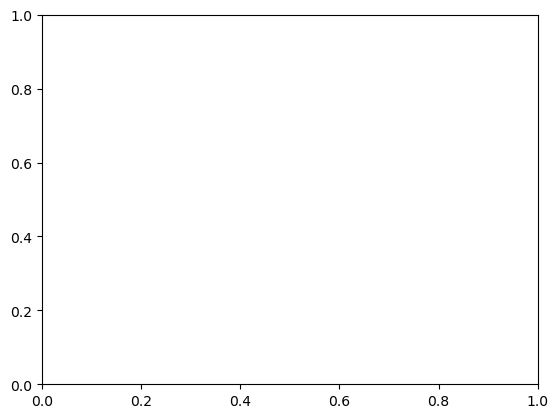

In [26]:
def run_genetic_algorithm(mutation_rate, USE_LIMIT):
    solutions, generation_counts = [], []
    for _ in range(repeats):
        solution, generation_count, diversity_data = genetic_algorithm(target_string, alphabet, population_size, generation_limit, crossover_rate, mutation_rate, k, USE_LIMIT)
        solutions.append(solution)
        generation_counts.append(generation_count)
    # plot population diversity over generations                              New
    plot_population_diversity(diversity_data, generation_count)

    # # plot sequence logo of the population in the last generation           New (optional)
    # sequence_logo(population)

    successes = sum(solution == target_string for solution in solutions)
    success_rate = successes / repeats

    return success_rate, generation_counts

# Set common parameters
k = 2   # number of competitors for each tournament selection
repeats = 10  # number of times to repeat each experiment
generation_limit = 100

# Run genetic algorithm with different mutation rates and generation limits
mutation_rate_1 = 1 / L
USE_LIMIT_1 = False

mutation_rate_2 = 0
USE_LIMIT_2 = True

mutation_rate_3 = 3 / L
USE_LIMIT_3 = True

# Run and print results
success_rate_1, generation_counts_1 = run_genetic_algorithm(mutation_rate_1, USE_LIMIT_1)
success_rate_2, generation_counts_2 = run_genetic_algorithm(mutation_rate_2, USE_LIMIT_2)
success_rate_3, generation_counts_3 = run_genetic_algorithm(mutation_rate_3, USE_LIMIT_3)

print(f"Mutation Rate: {mutation_rate_1},  Success Rate: {success_rate_1:.2f}, Average Generation count: {np.mean(generation_counts_1):.2f}")
print(f"Mutation Rate: {mutation_rate_2},  Success Rate: {success_rate_2:.2f}, Average Generation count: {np.mean(generation_counts_2):.2f}")
print(f"Mutation Rate: {mutation_rate_3},  Success Rate: {success_rate_3:.2f}, Average Generation count: {np.mean(generation_counts_3):.2f}")

# Exercise 4